This notebook performs a continous recording using a start and stop button

## Import required modules

In [19]:
%matplotlib widget
import pydaqhat as py
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import soundfile as sf
from mutagen.flac import FLAC
from ipywidgets import widgets

## Continous recording
Use start/stop buttons to control recording

In [20]:
channels = [0] # Channels to use
iepe_enable = False # Enable/disable IEPE
sensitivity = 1000 # Sensitivity in mV/unit
sample_rate = 20480 # Number of samples per second
buffer_size = 10000 # Number of samples to keep in buffer before overwriting  
unit = ("Voltage", "V") # Unit of measurement. Format is (unit_name, unit_unit)

In [21]:
start = False
data = []
hat = None

def start_click(i):
    global start
    
    if(start == False):
        main()
        start = True

def stop_click(i):
    global data
    global start
    
    if(start == True):
        data = stop_record()
        start = False
        
def stop_record():
    # Dump entire contents of buffer
    data = hat.a_in_scan_read(-1,0).data
    
    hat.a_in_scan_stop()
    hat.a_in_scan_cleanup()
    
    print("Scan has finished with length {}".format(len(data)))
          
    return data

def continous_record():
    return py.continous_scan_start(
        channels=channels, 
        iepe_enable=iepe_enable, 
        sensitivity=sensitivity, 
        sample_rate=sample_rate, 
        buffer_size=buffer_size
    )

def main():
    global hat
    hat = continous_record()

start_button = widgets.Button(description = "Start")
start_button.on_click(start_click)
stop_button = widgets.Button(description = "Stop")
stop_button.on_click(stop_click)
display(start_button, stop_button)


Button(description='Start', style=ButtonStyle())

Button(description='Stop', style=ButtonStyle())

## Save Recording to FLAC

In [22]:
filename = "data/continous_recording_0.flac"

hat = py.get_hat()
actual_sample_rate = round(hat.a_in_scan_actual_rate(sample_rate))
sf.write(filename, data, actual_sample_rate)

file = FLAC(filename)
file["Title"] = "Finite Recording"
file["Channels Used"] = str(channels)
file["IEPE Enable"] = str(iepe_enable)
file["Sensitivity"] = str(sensitivity)
file["Sample Rate"] = str(actual_sample_rate )
file["Unit"] = "{} ({})".format(unit[0], unit[1])
file.save()

print("Recording saved to {}".format(filename))

Recording saved to data/continous_recording_0.flac


## Visualise 

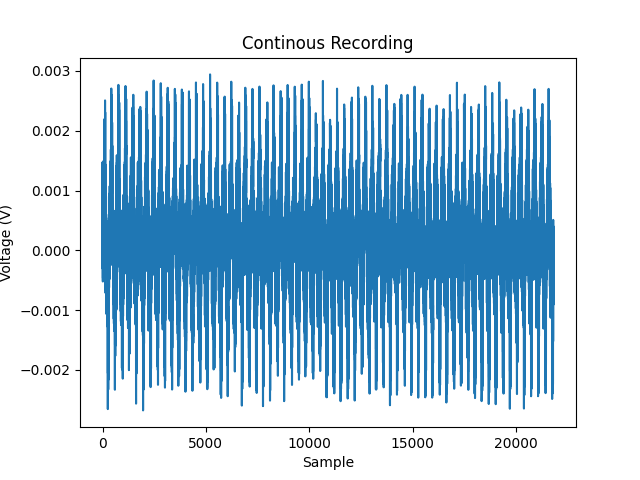

In [18]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_ylabel("Voltage (V)")
ax.set_xlabel("Sample")
ax.set_title("Continous Recording")
ax.plot(range(len(data)), data)